### The Bootstrap Method

In contemporary statistical practice, particularly as discussed in the [Sampling Distribution of a Statistic notebook](./3.Sampling_Distribution_of_a_Statistic.ipynb), it is often impractical and inefficient to continually collect new samples to estimate the variability of statistics. Instead, the bootstrap method is employed as a robust alternative for estimating standard errors and other statistical measures. This approach leverages the existing data by repeatedly resampling with replacement to generate numerous "bootstrap" samples. The variability observed in these bootstrap samples helps estimate the standard error.

This method is versatile because:
- It can be applied to almost any statistical measure.
- It does not rely on the central limit theorem or any specific assumptions about the distribution of the data or the sample statistic being normally distributed.

The bootstrap enhances the accuracy and reliability of statistical inference by providing a practical way to estimate the sampling distribution of statistics without the need for additional data collection.


### Conceptual Overview of the Bootstrap

The bootstrap technique simplifies the estimation of sampling distributions by treating the original sample as if it were the population. Conceptually, this involves replicating the original dataset numerous times to create a large hypothetical population that reflects the characteristics of the original sample. From this expanded dataset, statisticians can draw repeated samples to approximate the sampling distribution of almost any statistic.

> ### Key Terms for the Bootstrap
>
> - **Bootstrap sample:** A sample drawn with replacement from the observed dataset, treating it as if it were the population.
> - **Resampling:** The act of drawing samples repeatedly from a single observed dataset, which encompasses both bootstrap and permutation methods.
>
> 

### Basic Principles of Bootstrap Theory

The basic steps involved in bootstrap analysis are as follows:
1. Select an individual data point from the sample, record it, and then replace it in the dataset.
2. Repeat this process *n* times to form a new bootstrap sample.
3. Calculate the mean (or other statistics) of this resampled dataset.
4. Repeat the above steps *R* times to generate a large number of resampled statistics.
5. Use these repeated measurements to:
    - Calculate their standard deviation, providing an estimate of the standard error of the sample mean.
    - Produce visual representations like histograms or box plots to visualize the distribution.
    - Construct confidence intervals around the statistic.


The more iterations you do, the more accurate the estimate of the standard error will be.
By implementing the bootstrap method, data scientists can make effective statistical inferences with a high degree of confidence, even when the original sample size is not large.

### Practical Implementation and Visualization of the Bootstrap Method

Below, we can see a plot that visualizes the distribution of median incomes calculated from bootstrap samples. In this implementation, we utilized the `resample` function from `scikit-learn`, which efficiently handles resampling with replacement from the existing dataset. This function is particularly useful because it is optimized for compatibility with large datasets and integrates seamlessly into workflows that include other machine learning and statistical tools from `scikit-learn`.

By generating a thousand bootstrap samples and calculating their median values, we create a histogram that displays how these median values are distributed. This visual representation helps us understand the variability of the median incomes and provides a practical insight into how the standard error and bias of these estimates can be assessed through the bootstrap method. The distribution shown in the histogram tends to approximate a normal distribution as the number of resamples increases, demonstrating the robustness of the bootstrap method even without assuming the underlying distribution of the data.

This approach not only underscores the versatility of the bootstrap method in statistical inference but also highlights the importance of visualization in understanding statistical concepts and results. By viewing the distribution of bootstrap medians, researchers and data scientists can gain deeper insights into the uncertainty and reliability of the statistical estimates derived from their data, thus enhancing the decision-making process based on these analyses.


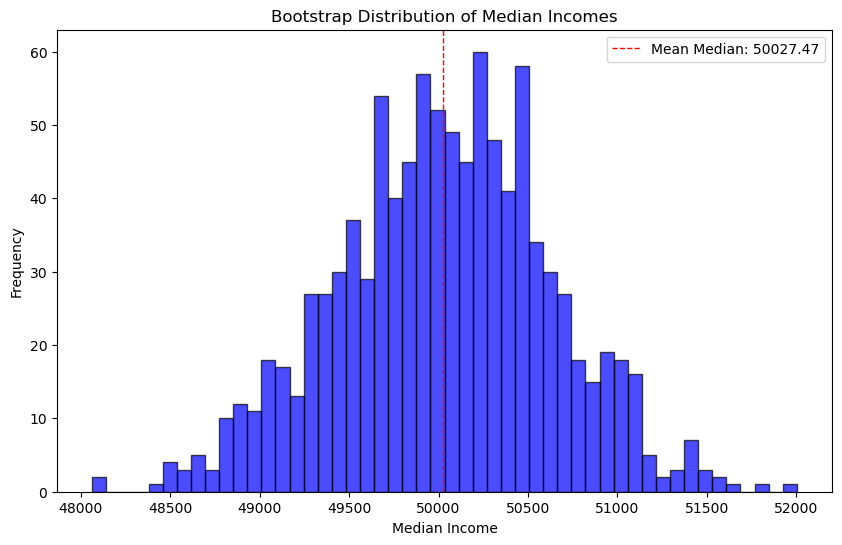

Original Median Income: 50039.74416930059
Bootstrap Bias: -12.277661134721711
Bootstrap Standard Error: 601.9672223732399


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

np.random.seed(42)
population_incomes = np.random.normal(loc=50000, scale=15000, size=100000)  # Mean = 50,000, SD = 15,000, n = 100,000

n_bootstrap_samples = 1000
bootstrap_sample_size = 1000
bootstrap_medians = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = resample(population_incomes, n_samples=bootstrap_sample_size, replace=True)
    median_income = np.median(bootstrap_sample)
    bootstrap_medians.append(median_income)

bootstrap_medians = np.array(bootstrap_medians)

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(bootstrap_medians), color='red', linestyle='dashed', linewidth=1, label=f'Mean Median: {np.mean(bootstrap_medians):.2f}')
plt.legend()
plt.show()

original_median = np.median(population_incomes)
bias = np.mean(bootstrap_medians) - original_median
standard_error = np.std(bootstrap_medians)

print(f"Original Median Income: {original_median}")
print(f"Bootstrap Bias: {bias}")
print(f"Bootstrap Standard Error: {standard_error}")


## Applications of the Bootstrap Method

Bootsrap can be applied to multivariate data where entire rows are sampled as units, allowing for comprehensive analysis across multiple variables. This method is particularly useful in evaluating the stability of model parameters or enhancing the predictive power of models.

### Applications in Machine Learning

In the realm of machine learning, especially with decision trees and their ensembles such as Random Forests, the bootstrap method enhances model performance. This technique, known as **bagging** (bootstrap aggregating), involves running multiple decision trees on bootstrap samples and then combining their outputs. For classification tasks, this might involve a majority vote among the trees, whereas for regression, it typically involves averaging the predictions. This approach generally yields better results than relying on a single decision tree, as it effectively reduces variance and avoids overfitting.

### Resampling: A Broader Context

While **bootstrapping** specifically refers to resampling with replacement, the broader term **resampling** can also encompass permutation procedures where multiple samples are combined and the sampling might be done without replacement.

> ### NOTE:
> The bootstrap method does not mitigate the limitations of having a small sample size. It does not generate new data or address gaps within the existing dataset. Instead, it provides insights on how multiple additional samples might behave if they were drawn from a population similar to our original sample.

